In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import random
from joblib import dump, load
from sklearn.model_selection import *
import numpy as np

In [134]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
train = pd.read_csv(r"train.csv")
test = pd.read_csv(r"test.csv")

In [ ]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-4.671772,-3.461845,-2.066095,-1.655069,-0.425867,1.058435,1.061260,2.250484,2.426598,3.685450,...,6.722083,3.572923,2.853526,4.195000,6.727384,8.029945,2.267263,4.195754,open,healthy
1,3.709384,5.854395,-1.384827,-1.124265,0.790696,1.943475,7.114905,-7.119885,-6.989324,-6.979079,...,2.242756,-5.141433,-8.236650,-8.434049,-8.023826,-2.355864,-2.595016,-1.807263,open,alzeimer
2,-2.362995,-3.398816,0.020892,-2.548365,-4.195050,-4.611305,-3.965788,3.069318,-0.961480,-4.775025,...,-1.448561,7.589728,1.999001,-3.703594,-1.602367,4.475797,4.416044,2.892512,closed,healthy
3,2.647627,-1.865227,6.627169,-2.410136,-4.767218,-5.702431,-6.164886,4.241711,-5.237383,-8.853911,...,-9.884784,0.447057,-5.166823,-8.447102,-10.749571,-7.964412,-1.510996,-4.091464,closed,alzeimer
4,-4.786032,-5.087481,-3.308594,-2.084521,-1.936765,-1.175357,-2.836520,-5.077035,-0.245455,3.847386,...,5.343685,-3.875226,-0.438329,4.010690,9.268739,9.678826,2.347711,7.895276,closed,alzeimer


In [ ]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       160 non-null    float64
 1   1       160 non-null    float64
 2   2       160 non-null    float64
 3   3       160 non-null    float64
 4   4       160 non-null    float64
 5   5       160 non-null    float64
 6   6       160 non-null    float64
 7   7       160 non-null    float64
 8   8       160 non-null    float64
 9   9       160 non-null    float64
 10  10      160 non-null    float64
 11  11      160 non-null    float64
 12  12      160 non-null    float64
 13  13      160 non-null    float64
 14  14      160 non-null    float64
 15  15      160 non-null    float64
 16  16      160 non-null    float64
 17  17      160 non-null    float64
 18  18      160 non-null    float64
 19  19      160 non-null    object 
 20  20      160 non-null    object 
dtypes: float64(19), object(2)
memory usage:

In [ ]:
test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       32 non-null     float64
 1   1       32 non-null     float64
 2   2       32 non-null     float64
 3   3       32 non-null     float64
 4   4       32 non-null     float64
 5   5       32 non-null     float64
 6   6       32 non-null     float64
 7   7       32 non-null     float64
 8   8       32 non-null     float64
 9   9       32 non-null     float64
 10  10      32 non-null     float64
 11  11      32 non-null     float64
 12  12      32 non-null     float64
 13  13      32 non-null     float64
 14  14      32 non-null     float64
 15  15      32 non-null     float64
 16  16      32 non-null     float64
 17  17      32 non-null     float64
 18  18      32 non-null     float64
 19  19      32 non-null     object 
 20  20      32 non-null     object 
dtypes: float64(19), object(2)
memory usage: 5

In [ ]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,-2.889218,-2.881959,-1.351741,-2.649713,-3.175289,-2.970533,-1.772521,2.003331,-0.905472,-2.215424,-2.106193,-0.200659,1.631469,0.282932,-1.110218,-1.259794,-0.163505,-0.172615,-0.686937
std,4.079779,4.401890,4.445836,4.182481,4.414129,4.467101,4.786825,4.220126,4.652227,4.938526,4.998106,4.558931,4.562768,4.726951,4.370161,4.876666,4.766065,3.886714,4.092512
min,-9.281637,-11.636408,-9.984884,-11.778651,-11.231328,-11.617553,-10.845704,-7.231953,-10.659958,-12.124792,-11.779361,-9.884784,-8.862269,-8.826442,-8.574989,-10.803057,-8.843943,-8.893015,-8.930116
25%,-6.072569,-6.303121,-4.362666,-5.052422,-5.832099,-7.012128,-5.659107,-1.052742,-4.848603,-6.694775,-5.444280,-3.483485,-1.075347,-3.534259,-4.573720,-5.352598,-3.951318,-2.839461,-4.385447
50%,-4.319531,-4.362244,-1.892443,-3.008476,-3.109750,-2.603046,-1.749047,2.473684,0.172482,-1.179294,-2.842408,-0.487219,1.441204,-0.127036,-1.570100,-1.477903,-1.216460,0.062631,-0.480463
75%,1.192704,1.966050,1.900801,-0.410054,-0.315213,0.279401,1.683536,5.291458,2.542227,2.011384,1.540628,3.164303,4.949566,4.238732,2.903204,2.035618,3.346907,2.283574,2.755194
max,4.948767,6.623631,9.102465,6.303770,5.635296,6.727885,9.275361,9.494421,7.993840,6.279736,7.806767,9.154714,11.561672,10.673328,8.502620,9.701786,9.678826,11.102000,8.043249


In [ ]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,-4.192358,-3.680407,-2.830227,-3.864952,-4.179413,-3.705888,-1.897959,2.529784,-1.605883,-2.919506,-2.571023,0.444515,1.550058,-0.056240,-1.429463,-1.459227,-0.318980,-0.002581,-0.517831
std,3.627029,4.147330,3.950153,3.728186,4.070095,4.335130,4.824017,3.701009,4.720186,4.982846,5.374765,4.531926,4.822831,4.934732,4.366282,4.856507,4.403396,4.113972,3.891636
min,-9.198057,-10.431819,-10.062726,-9.909744,-11.172899,-11.523912,-10.589553,-6.894546,-9.275775,-11.001111,-11.625150,-8.332519,-6.528655,-8.004577,-8.401614,-8.023803,-6.215450,-7.435129,-6.882027
25%,-7.108079,-6.789926,-5.621932,-6.577546,-7.789569,-7.580939,-5.208452,0.567416,-4.985928,-6.534838,-7.154427,-3.345968,-1.963784,-3.614296,-4.927677,-5.839348,-4.133623,-3.385852,-3.982054
50%,-5.061146,-4.433026,-3.102103,-3.720195,-3.383691,-3.496778,-1.723233,2.385611,-2.290480,-4.193717,-3.197713,0.389164,1.490203,-0.515140,-2.161336,-2.197694,-1.609858,0.408267,0.388050
75%,-1.582940,-1.439522,-1.680899,-1.820293,-1.735991,-0.649984,0.695502,5.547260,2.115359,1.982500,0.637927,4.398249,5.184582,3.096813,3.018237,1.591674,3.656654,2.333526,2.865610
max,4.480844,5.758258,8.524468,6.267315,5.039695,5.587507,7.516354,8.836626,8.027048,5.142419,7.772173,7.612748,10.120862,10.515910,5.952815,7.680501,7.748627,8.948363,5.347918


In [ ]:
print(train.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64


In [ ]:
print(test.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64


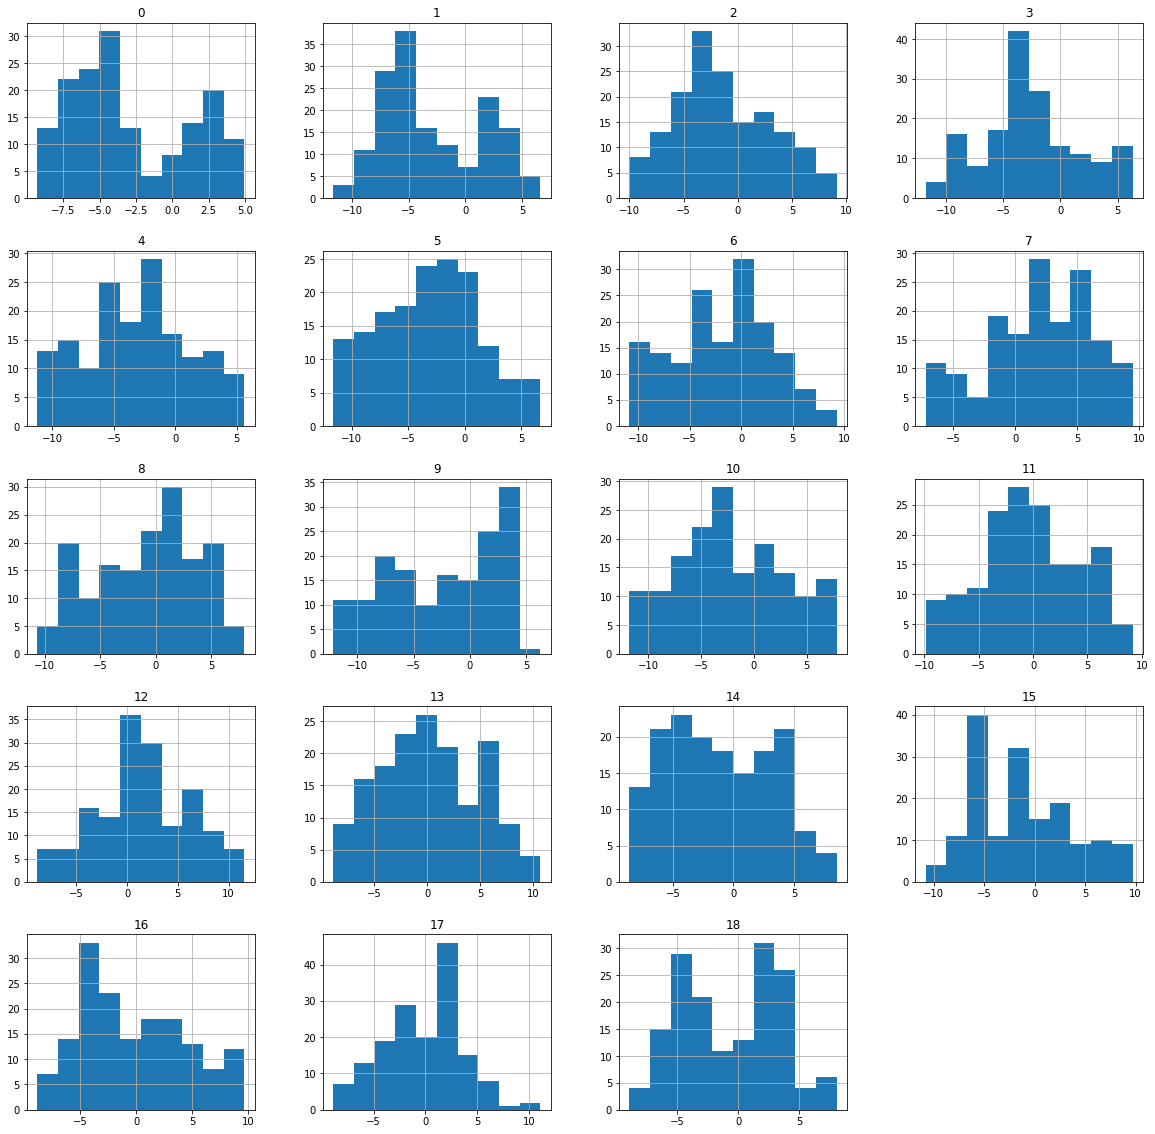

In [ ]:
p = train.hist(figsize = (20,20))

ENCODING THE DATA

In [ ]:
def encode(df) :
    df = pd.get_dummies(df,drop_first = True)
    df['alz_true'] =  1 - df['20_healthy']
    del df['20_healthy']
    return df

In [ ]:
train = encode(train)

In [ ]:
test = encode(test)

In [ ]:
train

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19_open,alz_true
0,-4.671772,-3.461845,-2.066095,-1.655069,-0.425867,1.058435,1.061260,2.250484,2.426598,3.685450,...,6.722083,3.572923,2.853526,4.195000,6.727384,8.029945,2.267263,4.195754,1,0
1,3.709384,5.854395,-1.384827,-1.124265,0.790696,1.943475,7.114905,-7.119885,-6.989324,-6.979079,...,2.242756,-5.141433,-8.236650,-8.434049,-8.023826,-2.355864,-2.595016,-1.807263,1,1
2,-2.362995,-3.398816,0.020892,-2.548365,-4.195050,-4.611305,-3.965788,3.069318,-0.961480,-4.775025,...,-1.448561,7.589728,1.999001,-3.703594,-1.602367,4.475797,4.416044,2.892512,0,0
3,2.647627,-1.865227,6.627169,-2.410136,-4.767218,-5.702431,-6.164886,4.241711,-5.237383,-8.853911,...,-9.884784,0.447057,-5.166823,-8.447102,-10.749571,-7.964412,-1.510996,-4.091464,0,1
4,-4.786032,-5.087481,-3.308594,-2.084521,-1.936765,-1.175357,-2.836520,-5.077035,-0.245455,3.847386,...,5.343685,-3.875226,-0.438329,4.010690,9.268739,9.678826,2.347711,7.895276,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-8.395624,-4.768467,-9.598362,-11.518448,-10.650624,-7.010555,-0.292097,-5.659645,-10.310552,-11.066761,...,1.505199,1.979788,-4.548264,-4.807219,-5.359723,3.904312,1.981752,1.325416,0,1
156,-7.425034,-6.428447,-8.501721,-9.613522,-9.503674,-8.481027,-4.789783,1.148729,-6.123685,-5.943070,...,6.297120,0.730107,-2.031718,-1.576786,-1.291962,2.256116,1.318757,1.121607,1,1
157,2.382906,3.468851,1.947540,2.060030,3.656525,5.388238,5.773988,2.671480,-1.664337,1.900638,...,5.165492,-8.862269,-5.596646,-4.011642,2.584083,2.216395,-8.893015,-4.125392,1,1
158,-5.356532,-6.103782,-4.113039,-3.008478,-4.197601,-5.368508,-6.981439,3.584509,4.336156,0.904990,...,-0.812220,7.972445,8.355350,3.759628,-0.916855,-1.379030,2.054217,-1.495972,1,1


In [ ]:
test

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19_open,alz_true
0,-5.147697,-4.069511,-2.675679,-1.877494,-0.803392,0.590511,0.387466,1.649253,2.020006,3.393995,...,6.689925,2.806568,2.284550,3.875231,6.526203,7.748627,1.487036,3.558579,1,0
1,-0.527267,3.105159,-3.596607,-4.208751,-2.157986,0.293128,5.934668,-4.406614,-6.672716,-6.151774,...,-1.753809,-4.716328,-6.550617,-6.709359,-6.197427,-4.428065,-4.695055,-4.963594,1,0
2,-1.627039,3.551956,-3.168972,-3.817566,-4.837647,-5.144810,4.834230,1.519697,-6.071300,-6.601756,...,-2.101869,-4.927761,-6.863948,-7.555564,-7.215934,-5.711018,-5.880586,-6.358817,1,0
3,1.407800,-6.107195,8.524468,-2.036496,-5.790715,-8.208743,-9.811143,6.059535,-3.085865,-6.842000,...,-6.686385,0.079588,-3.441120,-4.912162,-5.635865,-2.150755,-1.248687,-0.436080,0,1
4,-4.829639,-4.498040,-1.971049,-0.894110,-0.756761,-0.881804,-2.280562,5.804630,4.096418,2.091987,...,-0.073238,9.177040,6.552348,3.349693,1.551023,0.183745,6.354093,2.133264,0,0
5,4.480844,2.679116,3.940449,6.267315,5.039695,3.144642,-1.382152,5.496642,8.027048,4.177650,...,-8.332519,10.120862,8.436590,3.498311,-2.426376,-6.120919,8.948363,2.673673,0,1
6,-7.111557,-6.899678,-5.413936,-8.549934,-9.376572,-9.232702,-7.484341,2.872691,-4.880085,-7.709874,...,1.378298,4.983977,0.354968,-4.357405,-5.899581,-2.894153,-1.236001,-3.802889,1,1
7,-6.146266,-3.448232,-10.062726,-9.909744,-8.015423,-4.719976,0.603781,0.411633,-8.109541,-6.007352,...,5.548955,-1.746994,-4.133826,-2.204317,1.152432,5.291910,0.845758,3.389265,0,1
8,-8.266539,-3.354807,-8.633417,-3.306996,-0.392658,2.567608,2.804953,2.077767,2.571421,5.142419,...,6.191410,3.573081,5.111670,5.952815,7.207686,5.559418,3.425925,2.638094,0,1
9,-4.997345,-4.035187,-5.689155,-5.397129,-5.599668,-5.017067,-0.381546,0.973179,-0.470191,-4.291147,...,-3.505181,8.309160,5.646467,-1.706895,-3.090584,-1.515017,4.828469,0.510714,0,0


In [ ]:
X_train,y_train = train[train.columns[:-1]].values , train[train.columns[-1]].values
X_test,y_test = test[test.columns[:-1]].values, test[test.columns[-1]].values

In [ ]:
print(X_train.shape, y_train.shape)

(160, 20) (160,)


In [ ]:
print(X_test.shape, y_test.shape)

(32, 20) (32,)


SUPPORT VECTOR MACHINE (SVM)

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
Accuracy_SVM = clf.score(X_test, y_test)
print(Accuracy_SVM*100)

96.875


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [135]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [136]:
Accuracy_LR = logreg.score(X_test, y_test)
print(Accuracy_LR*100)

84.375


DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
Accuracy_DT = dt.score(X_test, y_test)
print(Accuracy_DT*100)

100.0


K-NEAREST NEIGHBOURS (KNN) ALGORITHM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
Accuracy_KNN = knn.score(X_test, y_test)
print(Accuracy_KNN*100)

96.875


RANDOM FOREST ALGORITHM

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
Accuracy_RF = rf.score(X_test, y_test)
print(Accuracy_RF*100)

100.0


COMPARISON OF SEVERAL MACHINE LEARNING ALGORITHMS

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
color = ['blue','orange','springgreen','fuchsia','red']

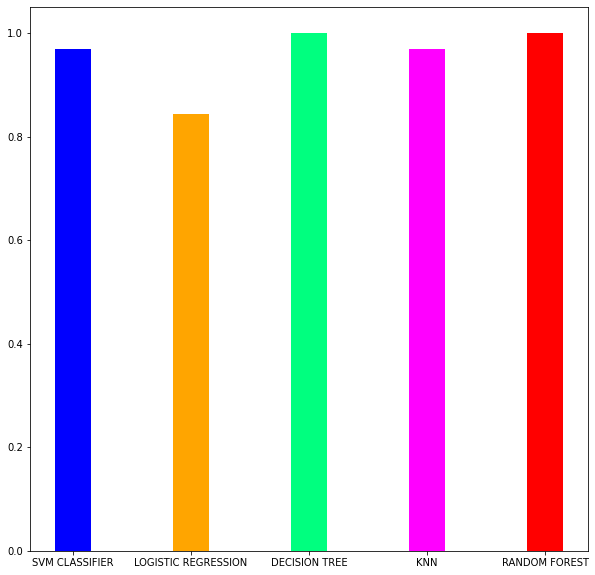

In [ ]:
scores = {"SVM CLASSIFIER" : Accuracy_SVM, "LOGISTIC REGRESSION" : Accuracy_LR, "DECISION TREE" : Accuracy_DT, "KNN" : Accuracy_KNN, "RANDOM FOREST" : Accuracy_RF}

plt.figure(figsize=(10, 10))
plt.bar(*zip(*scores.items()), width = 0.3,color = color)
plt.show()

**Based on the above results and taking into account the low sample size of the dataset,its important to train and test these models on different sets of training and testing sets to understand the generalization ability of our model**.
# COMPARISON OF VARIOUS ML MODELS ON DIFFERENT SET OF DATA


*   Our comparison technique starts by splitting a whole dataset into train/   test in 15 random ways using sklearn parameter "random_state".
*   In our next step fit everyone one of these models these 15 different datasets and note down the model's score on the randomly created on every test set.

*   Next we plot the results to find which model has the highest accuracy and at which "random_state" did we obtain it.


*   Then we take the models and fit by the best "random_state" to build a combined classifier to combine all the best models as our finalized model.



*   The best "random_state" can be obtained by finding which "random_state" produces most accuracy for the model.









i) Defining Functions for comparison

In [ ]:
X = np.concatenate([X_train,X_test])
y = np.concatenate([y_train,y_test])

In [ ]:
import random as Random
rands = [Random.randint(1,300) for i in range(0,15)]
def fit_and_score(model):
    scores = []
    states = []
    for i in range(15):
        state = rands[i]
        X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=state)
        model.fit(X_train,y_train)
        scores.append(model.score(X_test,y_test)*100)
        states.append(state)
    return scores,states    

In [137]:
models = [clf,logreg,dt,knn,rf]
model_names = ["SupportVectorMachine","Logistic","DecisionTree","KNearestNeighour","RandomForest"]
plot_scores = []
r_states = []

for model in models:
    scores,states = fit_and_score(model)
    plot_scores.append(scores)
    r_states.append(states)

In [ ]:
avg = [sum(vec)/len(vec) for vec in plot_scores]

ii) Plotting of all Models Performances on Different data

Model :  SupportVectorMachine  ->  Best State :  89
Model :  Logistic  ->  Best State :  111
Model :  DecisionTree  ->  Best State :  296
Model :  KNearestNeighour  ->  Best State :  111
Model :  RandomForest  ->  Best State :  296


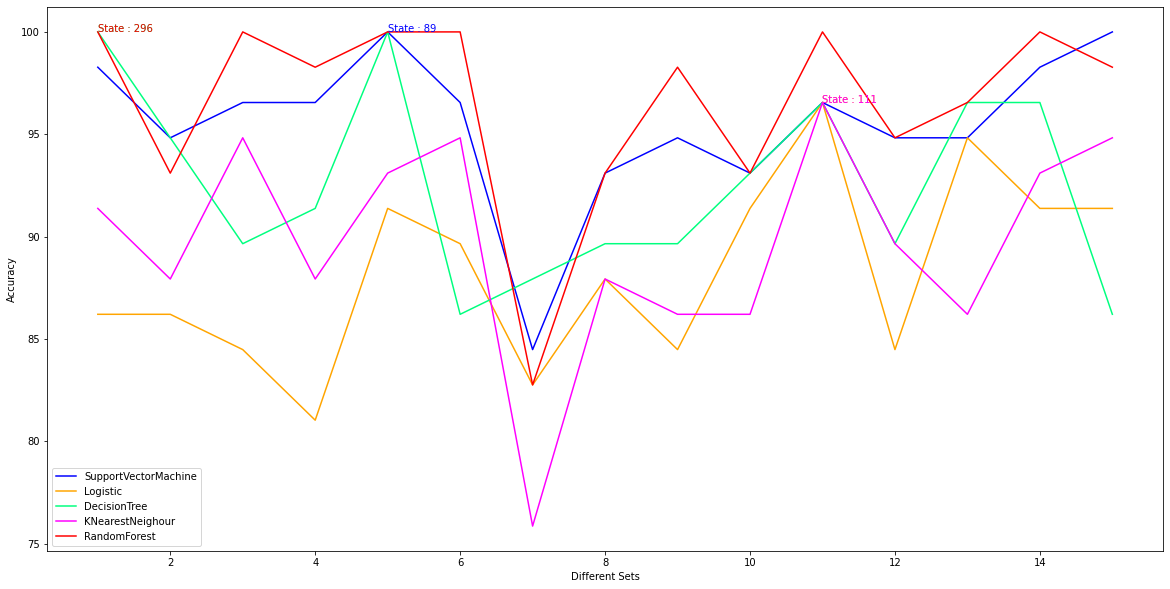

In [140]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

for i in range(0,5):
    plt.plot([s for s in range(1,16)],plot_scores[i],label = model_names[i],color = color[i])
    plt.legend()
    max_ind = plot_scores[i].index(max(plot_scores[i])) 
    max_state = r_states[i][max_ind]
    print("Model : ",model_names[i]," ->  Best State : ",max_state)
    plt.text(max_ind+1,plot_scores[i][max_ind],str("State : " + str(max_state)),size = 10,color = color[i])

plt.xlabel("Different Sets")
plt.ylabel("Accuracy")
plt.show()    


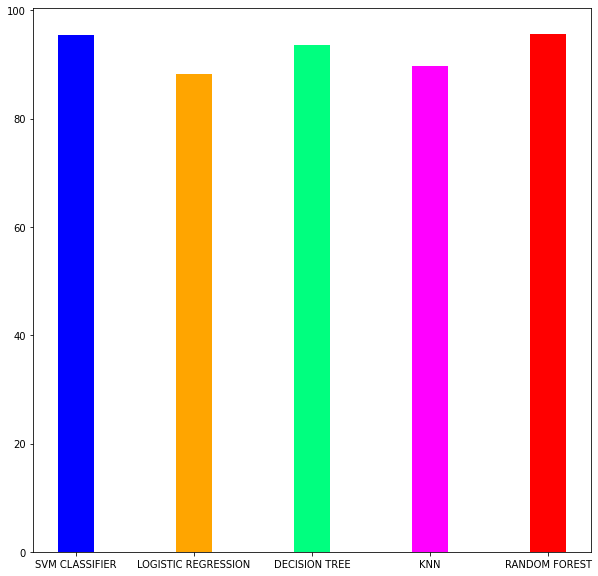

In [138]:
scores = {"SVM CLASSIFIER" : avg[0], "LOGISTIC REGRESSION" : avg[1], "DECISION TREE" : avg[2], "KNN" : avg[3], "RANDOM FOREST" : avg[4]}

plt.figure(figsize=(10, 10))
plt.bar(*zip(*scores.items()), width = 0.3,color = color)
plt.show()

# Buidling a combined classifier

**(i) Training Phase**

In [145]:
models = [svm.SVC(),
          LogisticRegression(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(n_neighbors = 3),
          RandomForestClassifier()]

model_names = ["SVM","LOGISTIC","DTC","KNN","RFC"]
best_r_states = [89,111,296,111,296]
def state_scores(model,name,state):  
    X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=state)
    model.fit(X_train, y_train)
    name = name + ".joblib"
    dump(model,name)
    return model.score(X_test,y_test)*100

for i in range(len(models)):
    print("Model Name : ",model_names[i])
    score = state_scores(models[i],model_names[i],best_r_states[i])
    print("Score : ",score)    

Model Name :  SVM
Score :  100.0
Model Name :  LOGISTIC
Score :  96.55172413793103
Model Name :  DTC
Score :  98.27586206896551
Model Name :  KNN
Score :  96.55172413793103
Model Name :  RFC
Score :  100.0


**(i) Testing Phase**

In [146]:
def combined_classifier():
    knn = load("/content/KNN.joblib")
    svvc = load("/content/SVM.joblib")
    rfc = load("/content/RFC.joblib")
    dtc = load("/content/DTC.joblib")
    log = load("/content/LOGISTIC.joblib")
    return (svvc,log,dtc,knn,rfc)

models = combined_classifier()

def predict(test):
    result1 = models[0].predict(test)
    result2 = models[1].predict(test)
    result3 = models[2].predict(test)
    result4 = models[3].predict(test)
    result5 = models[4].predict(test)
    results = np.array([result1,result2,result3,result4,result5]).T.tolist()
    results = [Counter(res).most_common(1)[0][0] for res in results]
    return np.array(results)

**Calling the combined classifier "predict"**

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=555)

In [148]:
preds = predict(X_test)

# Performance Metrics 

In [149]:
from sklearn.metrics import *

In [150]:
f1_score(preds,y_test)*100

98.50746268656717

In [151]:
precision_score(preds,y_test)*100

97.05882352941177

In [152]:
accuracy_score(preds,y_test)*100

98.27586206896551

In [153]:
confusion_matrix(preds,y_test)

array([[24,  1],
       [ 0, 33]])